In [10]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [11]:
# No Chnages were done during EDA so we use the encoded file - 1_ITSM_cleansed_Encoded.csv
df1 = pd.read_csv('1_ITSM_cleansed_Encoded_All.csv')
df1.columns

Index(['c_CI_Cat', 'c_CI_Name', 'c_CI_Subcat', 'c_Closure_Code', 'c_WBS',
       'q_No_of_Reassignments', 'q_No_of_Related_Incidents',
       'q_No_of_Related_Interactions', 't_Close_Time', 't_Open_Time',
       'y_Priority', 't_ReopenFlag', 't_TicketWIPDurationDays'],
      dtype='object')

In [12]:
# Setting the lists
CatVarList = ['c_CI_Cat', 'c_CI_Name', 'c_CI_Subcat', 'c_Closure_Code', 'c_WBS','t_ReopenFlag']
ConVarList = ['q_No_of_Reassignments', 'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
DatVarList = ['t_Close_Time', 't_Open_Time']
OutValList = ['y_Priority']

In [13]:
df1.head()

,c_CI_Cat,c_CI_Name,c_CI_Subcat,c_Closure_Code,c_WBS,q_No_of_Reassignments,q_No_of_Related_Incidents,q_No_of_Related_Interactions,t_Close_Time,t_Open_Time,y_Priority,t_ReopenFlag,t_TicketWIPDurationDays
0,11,2313,54,4,126,26,2.0,1.0,2013-11-04 13:51:00,2012-02-05 13:32:00,3,0,638.013194
1,1,2415,54,6,65,33,1.0,1.0,2013-12-02 12:36:00,2012-03-12 15:44:00,2,1,629.869444
2,1,2415,54,3,65,13,0.0,1.0,2013-11-14 09:31:00,2012-07-17 11:49:00,3,0,484.904167
3,1,2415,54,4,65,2,0.0,1.0,2013-11-08 13:55:00,2012-08-10 11:01:00,3,0,455.120833
4,1,2415,54,4,65,4,0.0,1.0,2013-11-08 13:54:00,2012-08-10 11:27:00,3,0,455.102083


## Full Correlation matrix

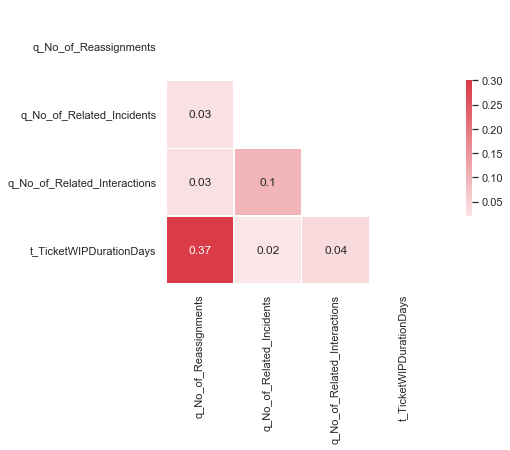

In [14]:
# Run Correlation on continuous varibales
Corr_All= df1[ConVarList].corr().round(2)
# Masking of upper traingle
sb.set(style="white")
mask = np.zeros_like(Corr_All, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plotting
rcParams['figure.figsize'] = 10,5
sb.heatmap(Corr_All,annot = True,mask=mask,cmap = sb.diverging_palette(220, 10, as_cmap=True),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

#The Correaltion Between the predictors is less hence none get deleted

In [15]:
# There are 258 wbse which doent make sense as it cannot indicate any department So we delete it
# Delete t_Reopen_Time & Category column
#DeletColList = ['c_WBS']

# Delete the listed columns / features
#df1.drop(DeletColList, inplace=True, axis=1)

# Index the columns to keep catagorical, continous and outcome separately
#df1=df1.sort_index(axis=1)

df1.head()

,c_CI_Cat,c_CI_Name,c_CI_Subcat,c_Closure_Code,c_WBS,q_No_of_Reassignments,q_No_of_Related_Incidents,q_No_of_Related_Interactions,t_Close_Time,t_Open_Time,y_Priority,t_ReopenFlag,t_TicketWIPDurationDays
0,11,2313,54,4,126,26,2.0,1.0,2013-11-04 13:51:00,2012-02-05 13:32:00,3,0,638.013194
1,1,2415,54,6,65,33,1.0,1.0,2013-12-02 12:36:00,2012-03-12 15:44:00,2,1,629.869444
2,1,2415,54,3,65,13,0.0,1.0,2013-11-14 09:31:00,2012-07-17 11:49:00,3,0,484.904167
3,1,2415,54,4,65,2,0.0,1.0,2013-11-08 13:55:00,2012-08-10 11:01:00,3,0,455.120833
4,1,2415,54,4,65,4,0.0,1.0,2013-11-08 13:54:00,2012-08-10 11:27:00,3,0,455.102083


In [16]:
# Saving the file with normal encoding. and Masked after saving
df1.to_csv("3_ITSM_cleansed_Encoded_Engineered_All.csv",index=False)